## Business Understanding

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value  --> Target

ocean_proximity

## Data Understanding

In [1]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading data file 
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

C:\Users\E&M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\E&M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


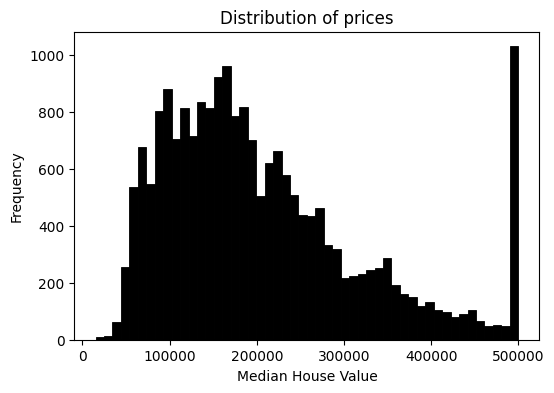

In [4]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of prices')

plt.show()

## Data Prepartion

In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df_filtered = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
df_filtered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [7]:
df.shape,df_filtered.shape

((20640, 10), (15687, 10))

In [8]:
features = ['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [9]:
#use only the features list
df_filtered = df_filtered[features]

In [10]:
df_filtered.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# ***Question 1*** <br>
There's one feature with missing values. What is it?

In [11]:
df_filtered.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer:total_bedrooms

# ***Question 2*** <br>
What's the median (50% percentile) for variable 'population'?

In [12]:
df_filtered.population.median()

1195.0

Answer:1195.0

prepare and split the dataset

In [13]:
np.random.seed(42)

n = len(df_filtered)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

n_train,n_val,n_test

(9413, 3137, 3137)

In [14]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 15684 15685 15686]
[15183  4469  9316 ...  5390   860  7270]


In [15]:
df_filtered_shuffled = df_filtered.iloc[idx]
df_filtered_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [16]:
df_train = df_filtered_shuffled.iloc[:n_train].copy()
df_val = df_filtered_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_filtered_shuffled.iloc[n_train+n_val:].copy()

df_train.shape,df_val.shape,df_test.shape

((9413, 9), (3137, 9), (3137, 9))

In [17]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

<Axes: >

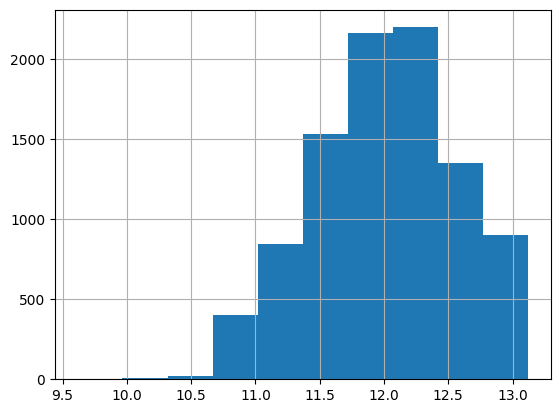

In [19]:
y_train.hist()

# ***Question 3*** <br>
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization - using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [20]:
df_filtered_shuffled.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [21]:
df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [22]:
mean_total_bedrooms = df_train.total_bedrooms.mean()
mean_total_bedrooms

542.552956325786

In [23]:
def train_linear_regression(X, y):
    #bias 
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
base = ['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [25]:
def prepare_X_way_1(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
def prepare_X_way_2(df):
    df_num = df[base]
    df_num = df_num.fillna(mean_total_bedrooms)
    X = df_num.values
    return X

In [27]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

## Way 1 
Filling missing values with 0

In [28]:
X_train = prepare_X_way_1(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [29]:
X_val = prepare_X_way_1(df_val)
y_pred = w_0 + X_val.dot(w)

In [30]:
score = rmse(y_val, y_pred)
round(score, 2)

0.34

## Way 2 
Filling missing values with Training mean

In [31]:
X_train = prepare_X_way_2(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [32]:
X_val = prepare_X_way_2(df_val)
y_pred = w_0 + X_val.dot(w)

In [33]:
score = rmse(y_val, y_pred)
round(score, 2)

0.34

Answer: Both are equally good

# Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

In [34]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [35]:
X_train = prepare_X_way_1(df_train)
X_val = prepare_X_way_1(df_val)

In [38]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print("r", r)
    y_pred = w_0 + X_val.dot(w)
    print('val', round(rmse(y_val, y_pred),2))
    print("-"*20)

r 0
val 0.34
--------------------
r 1e-06
val 0.34
--------------------
r 0.0001
val 0.34
--------------------
r 0.001
val 0.34
--------------------
r 0.01
val 0.34
--------------------
r 0.1
val 0.34
--------------------
r 1
val 0.34
--------------------
r 5
val 0.35
--------------------
r 10
val 0.35
--------------------


Answer: r=0

# Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


In [40]:
def splitting_data(seeder):
    np.random.seed(seeder)

    n = len(df_filtered)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_filtered_shuffled = df_filtered.iloc[idx]
    df_train = df_filtered_shuffled.iloc[:n_train].copy()
    df_val = df_filtered_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_filtered_shuffled.iloc[n_train+n_val:].copy()
    return df_train,df_val,df_test

def prepare_target(df_train,df_val,df_test):
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return y_train,y_val,y_test

In [43]:
scores_result = []

In [44]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train,df_val,df_test = splitting_data(i)
    y_train,y_val,y_test = prepare_target(df_train,df_val,df_test)
    X_train = prepare_X_way_1(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_way_1(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores_result.append(score)
    print("seeder: ",i,", results: ",score)

seeder:  0 , results:  0.337738716003986
seeder:  1 , results:  0.33779993536620756
seeder:  2 , results:  0.3384287006763761
seeder:  3 , results:  0.33200494683088133
seeder:  4 , results:  0.3394451862555541
seeder:  5 , results:  0.3433819705294903
seeder:  6 , results:  0.3385330211766813
seeder:  7 , results:  0.3468747697306719
seeder:  8 , results:  0.3512736865960523
seeder:  9 , results:  0.3341558266519897


In [46]:
round(np.std(scores_result),3)

0.005

answer : 0.005

# Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?


In [47]:
df_train,df_val,df_test = splitting_data(9)
y_train,y_val,y_test = prepare_target(df_train,df_val,df_test)

In [51]:
df_train.shape,df_val.shape

((9413, 8), (3137, 8))

In [52]:
df_train = pd.concat([df_train,df_val])

In [54]:
y_train = pd.concat([y_train,y_val])

In [55]:
X_train = prepare_X_way_1(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train,0.001)

In [56]:
X_test = prepare_X_way_1(df_test)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print("RMSE: ",score)

RMSE:  0.3338959865231396


Answer: 0.33